In [1]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, LSTM, TimeDistributed, Flatten

In [2]:
size = 50

In [3]:
def Next_frame(last_step, column, size):

    frame = np.zeros((size, size))

    lower = max(0, last_step - 3)
    upper = min(frame.shape[0]-1, last_step + 3)

    step = random.randint(lower, upper)

    cv2.circle(frame,(column, step), 3, 255, -1)

    return frame, step

In [4]:
def Build_frames(size):
    frames = list()

    step = random.randint(0, size-1)

    right = 1 if random.random() < 0.5 else 0
    col = 0 if right else size-1

    for i in range(0, size):
        col = i if right else size-1-i
        frame, step = Next_frame(step, col, size)
        frames.append(frame)

    return frames, right

In [5]:
def Generate_examples(size, num_of_patterns):
    X, y = list(), list()
    for _ in range(num_of_patterns):
        frames, right = Build_frames(size)
        X.append(frames)
        y.append(right)

    X = np.array(X).reshape(num_of_patterns, size, size, size, 1)
    y = np.array(y).reshape(num_of_patterns, 1)

    return X, y

<-- Left


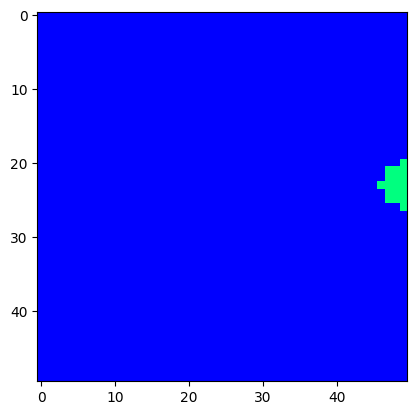

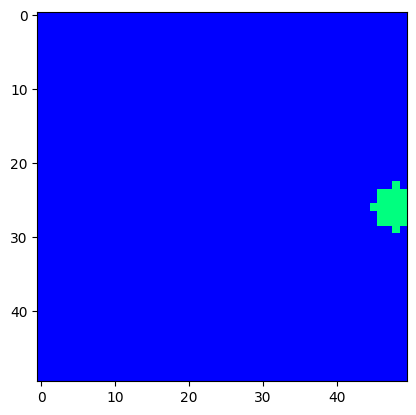

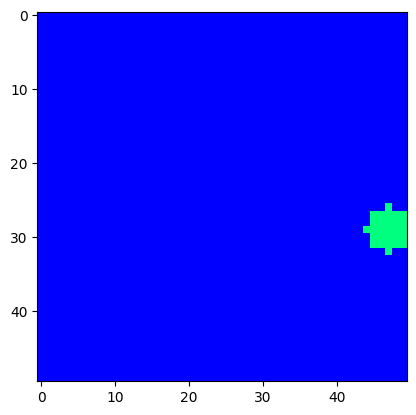

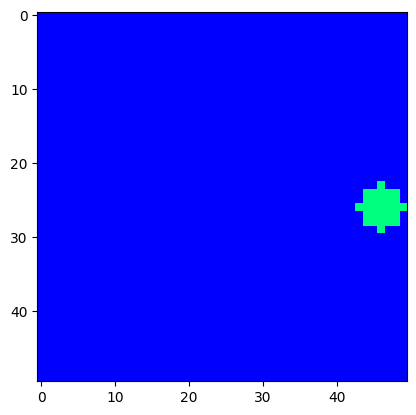

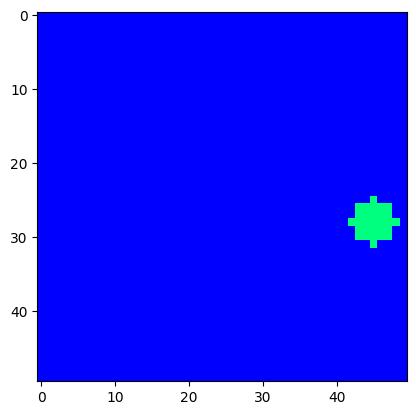

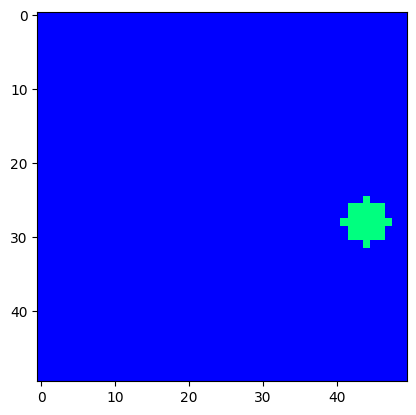

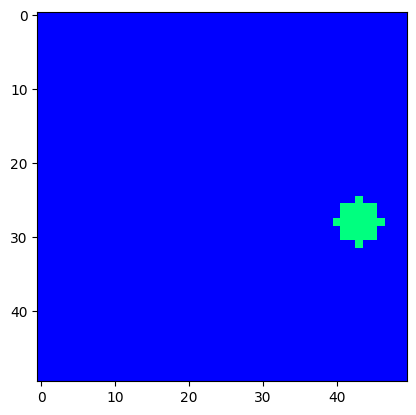

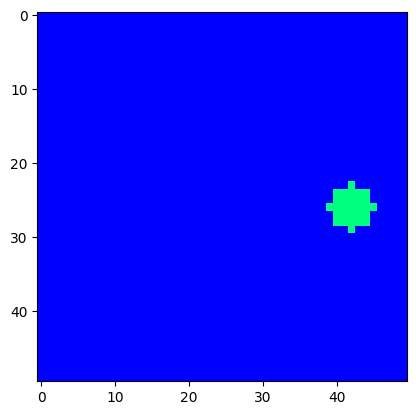

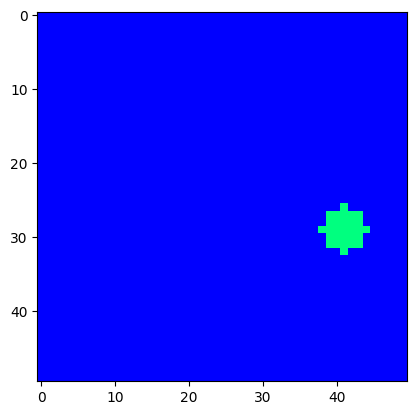

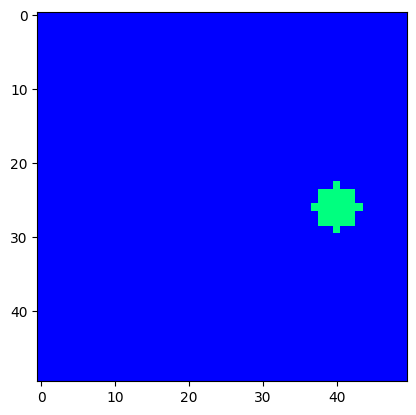

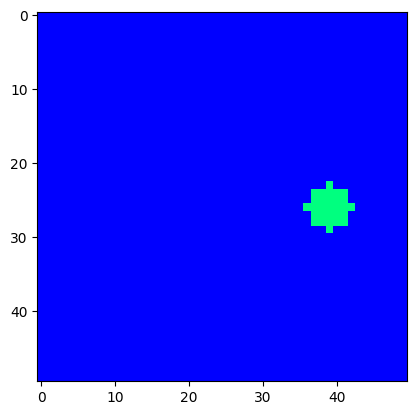

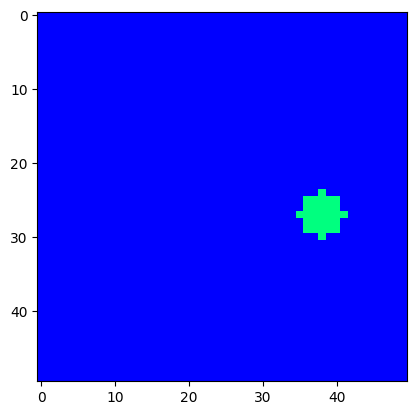

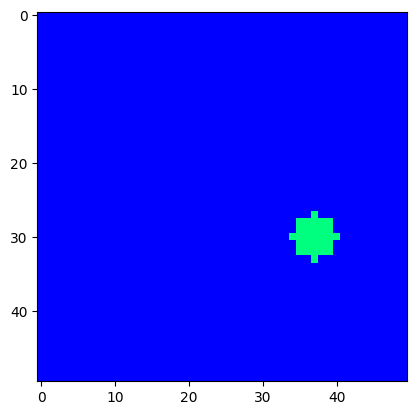

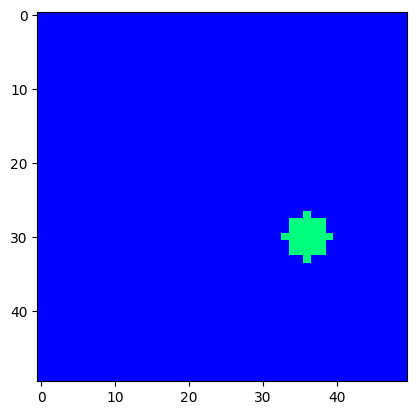

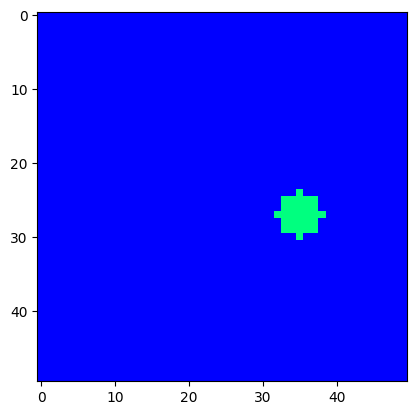

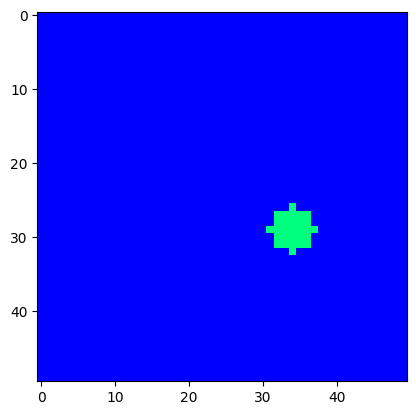

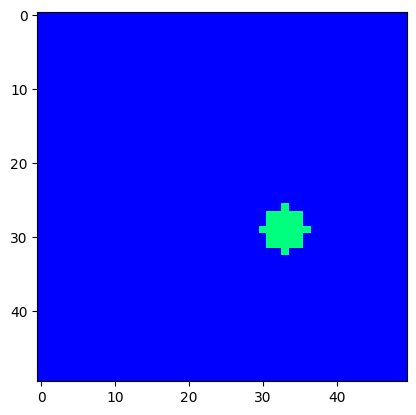

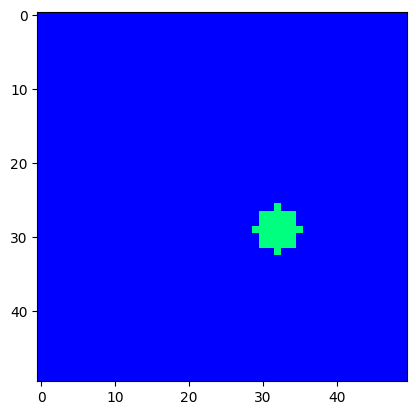

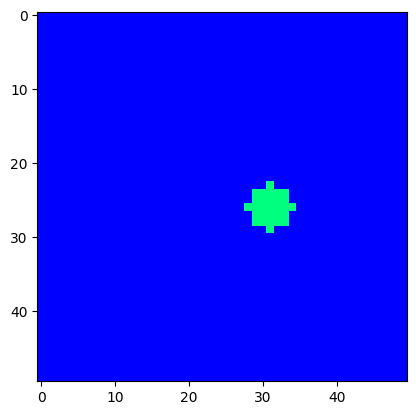

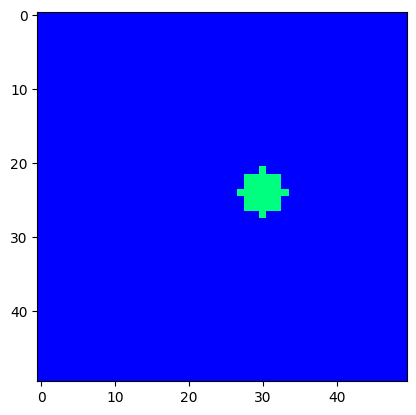

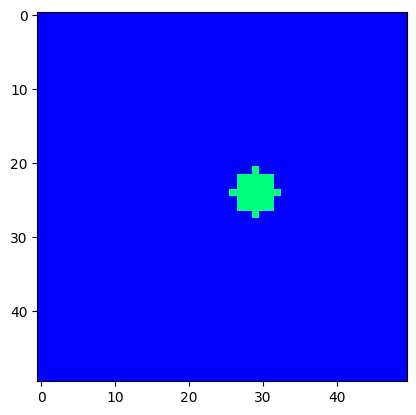

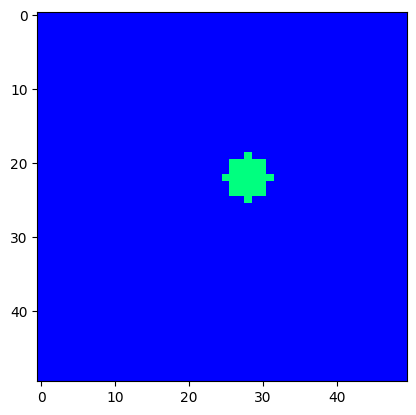

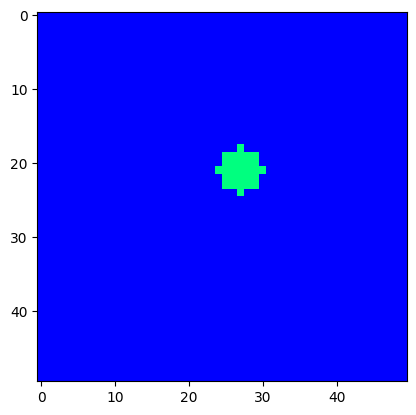

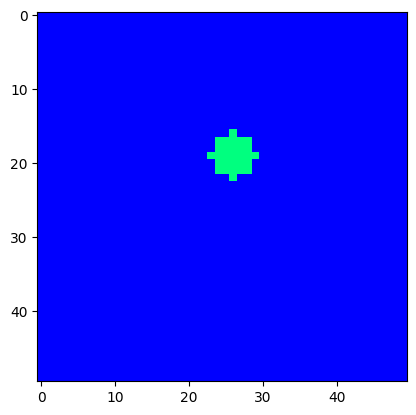

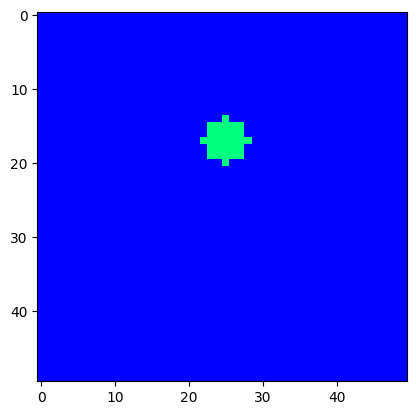

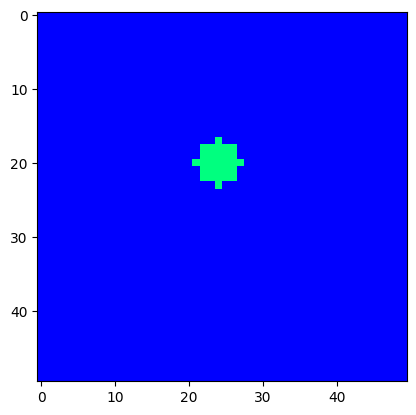

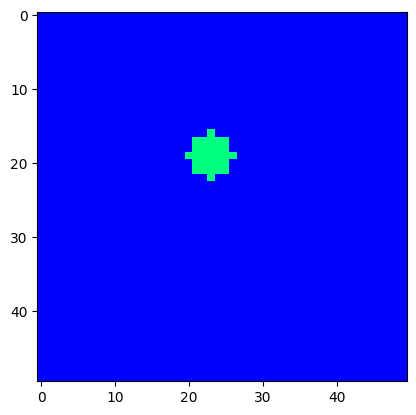

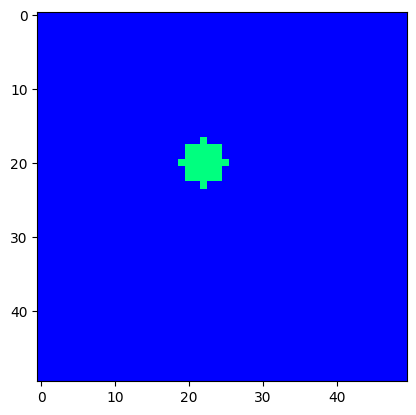

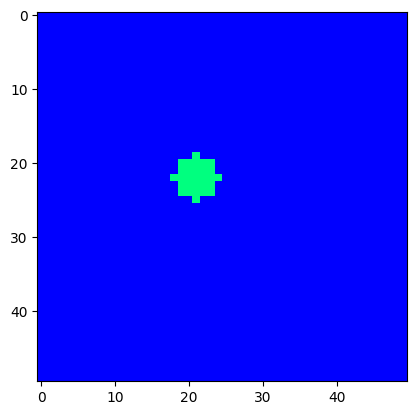

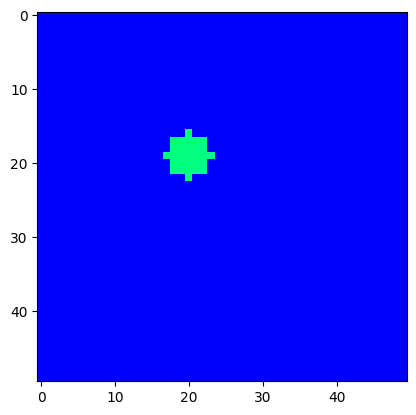

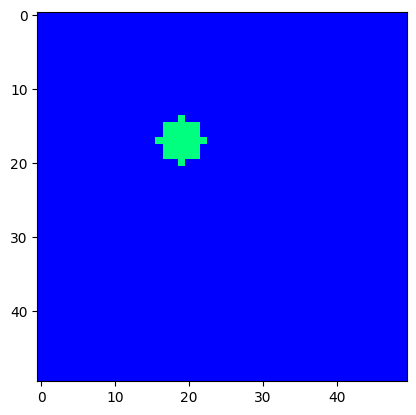

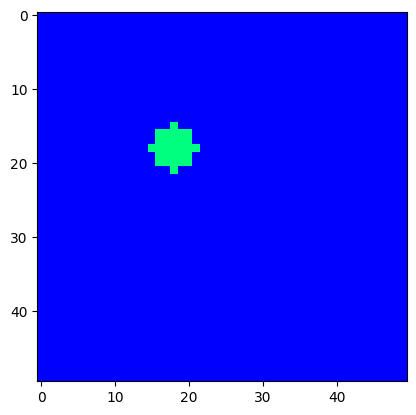

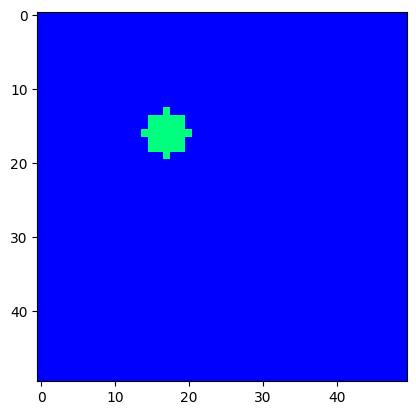

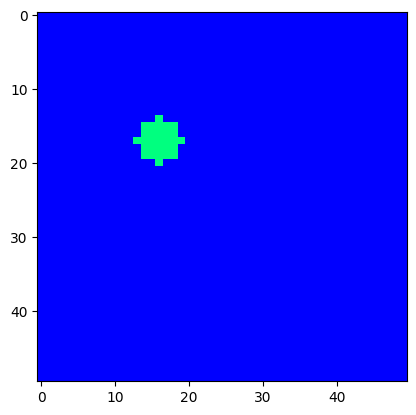

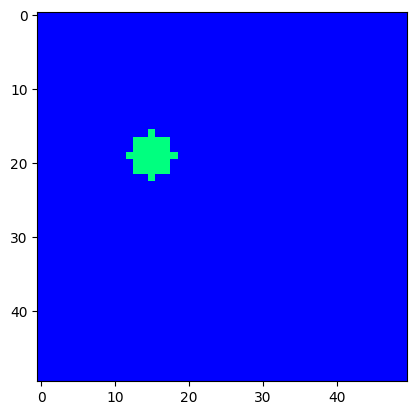

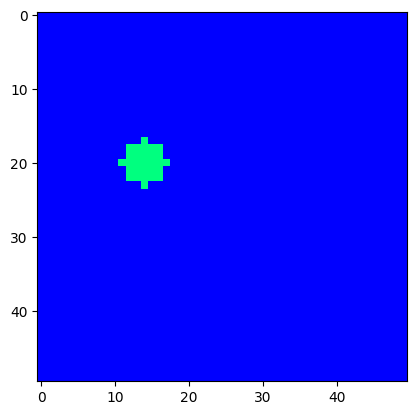

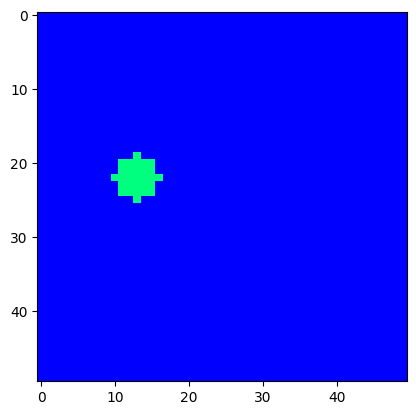

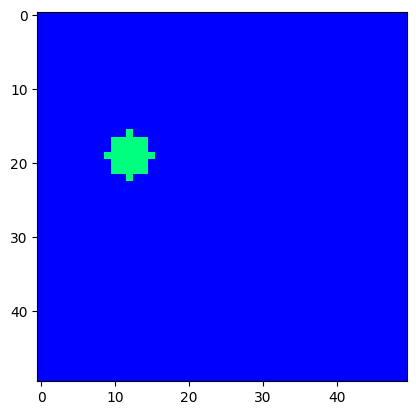

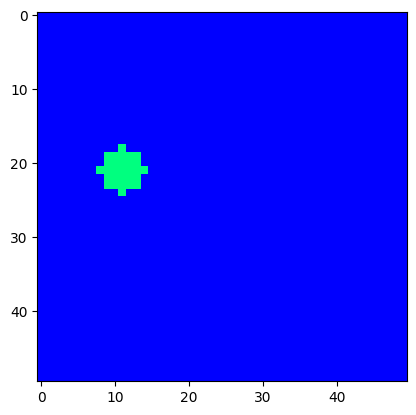

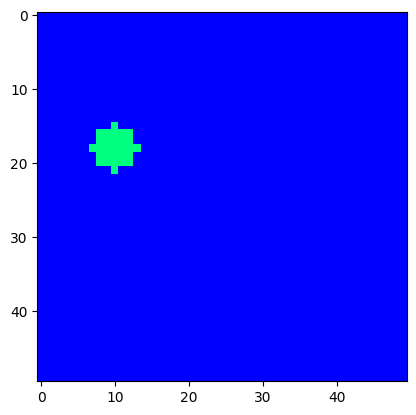

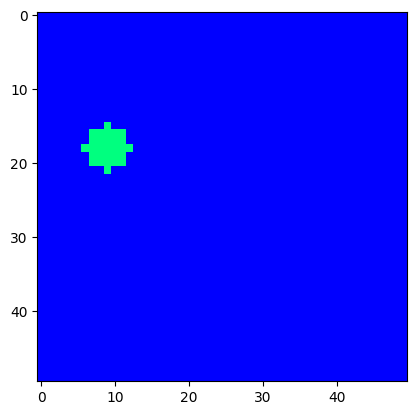

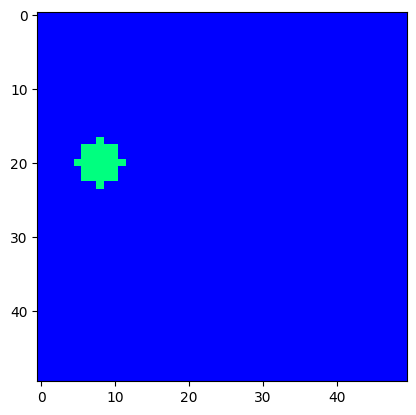

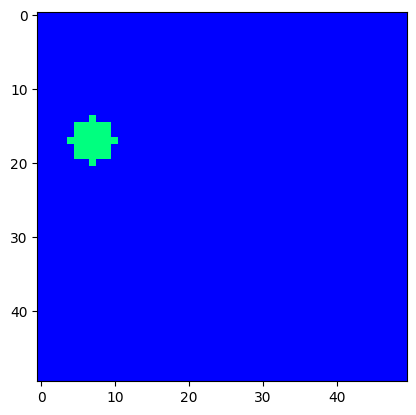

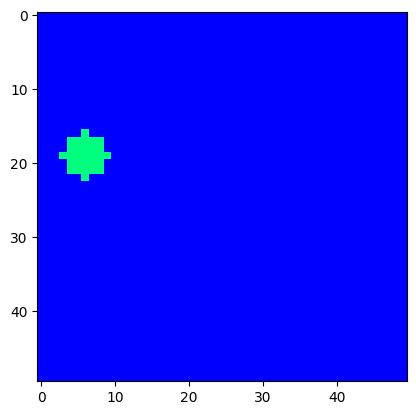

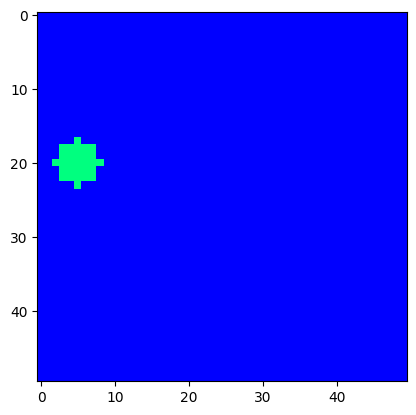

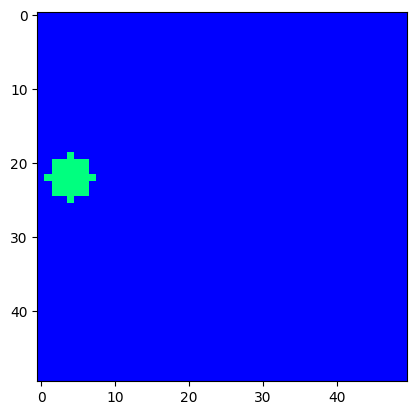

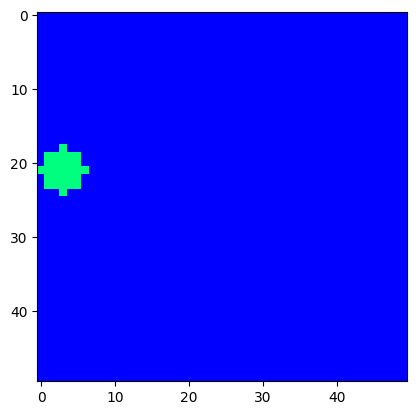

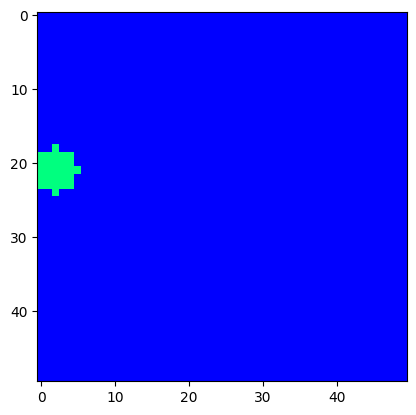

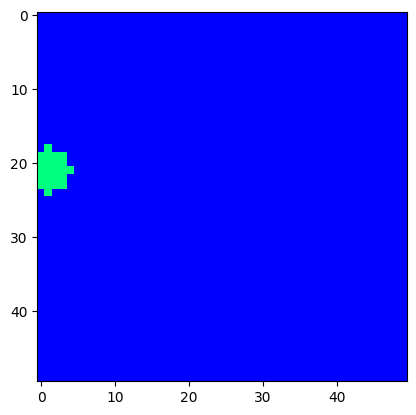

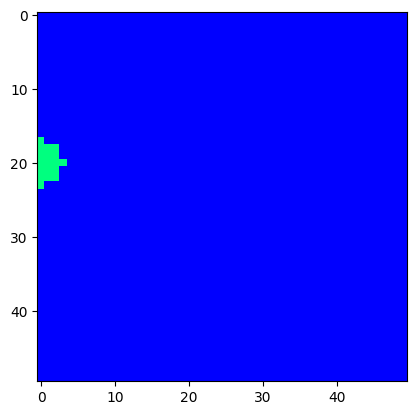

In [6]:
X, Y = Generate_examples(size, 1)
print("Right -->") if Y[0] else print("<-- Left")

for frame in X[0]:
    plt.imshow(frame[:, :, 0], cmap= "winter")
    plt.show()

In [7]:
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (3, 3), activation= "relu"), input_shape= (None, size, size, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size= (2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation= "sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 48, 48, 2)   20        
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 24, 24, 2)   0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 1152)        0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                240600    
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                        

In [9]:
model.compile(loss= "binary_crossentropy", optimizer= "adam", metrics=["acc"])

In [10]:
X, y = Generate_examples(size, 1000)
model.fit(X, y, batch_size= 32, epochs= 1)

32/32 [==============================] - 31s 879ms/step - loss: 0.1615 - acc: 0.9570


In [11]:
X, y = Generate_examples(size, 100)
loss, accuracy = model.evaluate(X, y, verbose=0)
print("Loss : %f\nAccuracy : %f" % (loss, accuracy * 100))

Loss : 0.022074
Accuracy : 100.000000


In [12]:
X, y = Generate_examples(size, 1)
yhat = model.predict(X, verbose= 0)
expected = "Right" if y[0] == 1 else "Left"
predicted = "Right" if yhat[0] == 1 else "Left"
print('Expected: %s, Predicted: %s' % (expected, predicted))

Expected: Left, Predicted: Left
